In [ ]:
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor , plot_tree
from sklearn.metrics import accuracy_score, classification_report ,precision_score , recall_score , f1_score , make_scorer , confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier , export_graphviz , plot_tree
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv('concrete_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 72.5+ KB


<ipython-input-151-9495fd734879>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


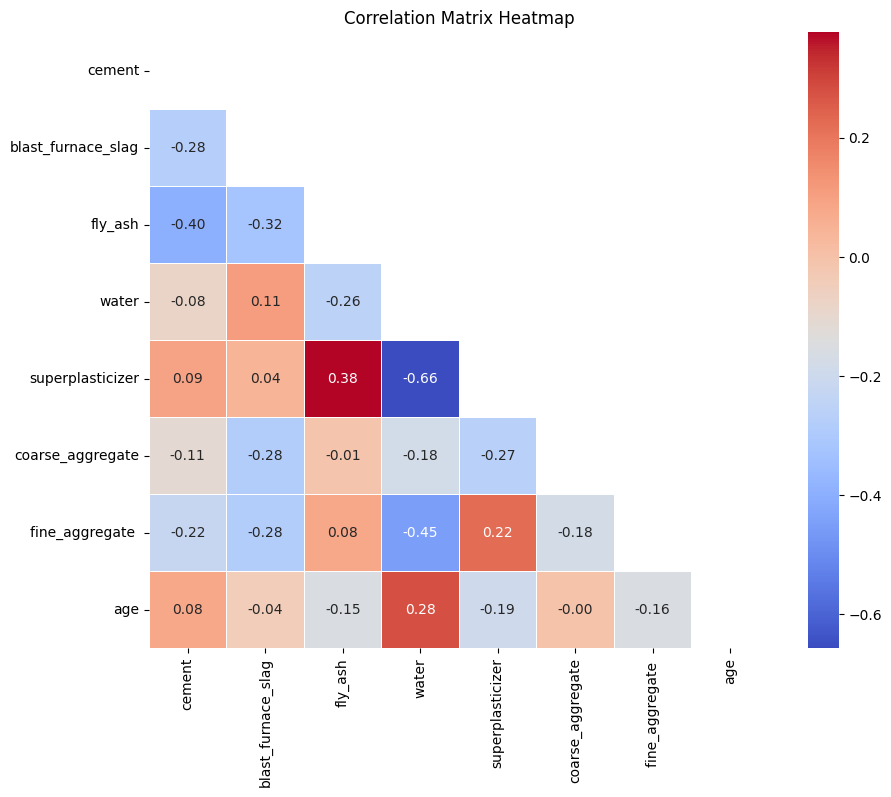

In [ ]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Define strength classes (example)
strength_classes = {
    "Low": (0, 25),  # Strength values in MPa
    "Medium": (25, 40),
    "High": (40, float('inf'))
}

# Map continuous strength values to classes (example)
df['concrete_compressive_strength'] = df['concrete_compressive_strength'].apply(lambda x: [k for k, v in strength_classes.items() if x >= v[0] and x < v[1]][0])


In [ ]:
features = df.drop('concrete_compressive_strength', axis=1)

target = df['concrete_compressive_strength']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [2, 3, 5,7,10],
    'min_samples_split': [2, 5, 10,20],
    'min_samples_leaf': [1, 5, 10,20]
}

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(features, target)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 5}
Best score: 0.6184466019417476


In [ ]:
model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split= 5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=5)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7572815533980582


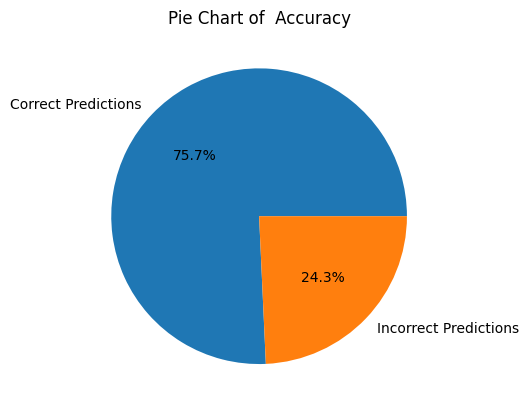

In [ ]:
pie_chart_slice_labels = ['Correct Predictions', 'Incorrect Predictions']

# Define pie chart slice values based on accuracy
pie_chart_slice_values = [accuracy, 1 - accuracy]

# Create a pie chart of the accuracy
plt.pie(pie_chart_slice_values, labels=pie_chart_slice_labels, autopct="%1.1f%%")
plt.title("Pie Chart of  Accuracy")
plt.show()

In [ ]:
y_pred = model.predict(X_test)  # Model predictions
y_true = y_test  # Actual labels (strength classes)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[58,  0, 21],
       [ 1, 52,  4],
       [14, 10, 46]])

<ipython-input-145-be99d3a1ffa2>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis')(np.linspace(0, 1, len(class_names)))  # Use a colormap


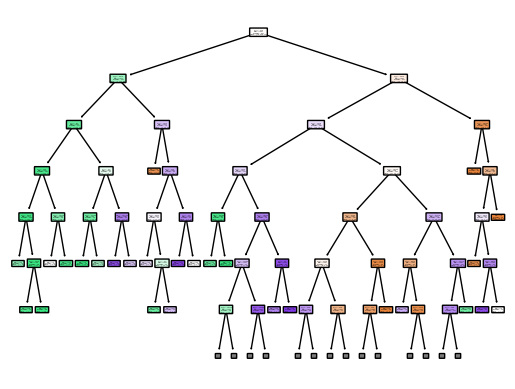

In [ ]:
# Define customization options
filled = True  # Fill internal nodes with colors
rounded = True  # Use rounded boxes for nodes
special_edge_color='red'  # Color for edges leading to specific classes

# Customize colors based on class labels
class_names = np.unique(y_train)  # Replace with your class labels
colors = plt.cm.get_cmap('viridis')(np.linspace(0, 1, len(class_names)))  # Use a colormap

# Generate the plot
plot_tree(model, max_depth=6, filled=True, rounded=True,
          class_names=class_names)

# Additional options:
# - feature_names (list of feature names for clarity)
# - fontsize (font size for text labels)
# - label_orientation (text orientation for horizontal/vertical trees)

plt.show()

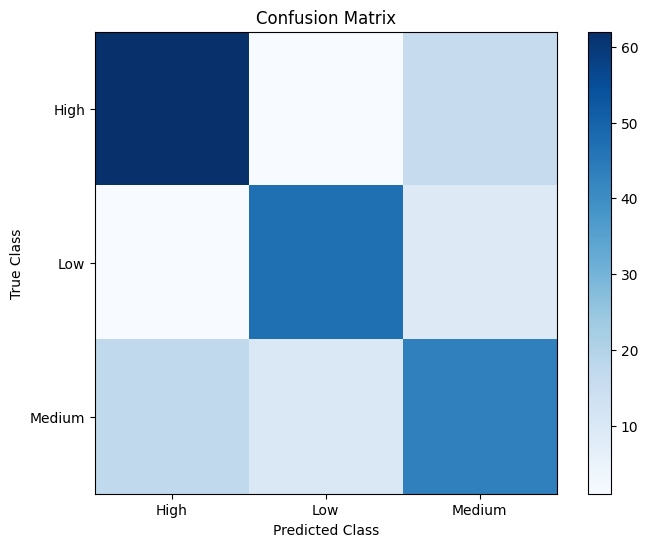

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap='Blues')  # Adjust colormap as needed
plt.colorbar()
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks(np.arange(len(np.unique(y_true))), np.unique(y_true))  # Adjust tick labels if needed
plt.yticks(np.arange(len(np.unique(y_true))), np.unique(y_true))
plt.title('Confusion Matrix')
plt.show()